# DL Project
#### NOVA IMS / BSc in Data Science

#### Group:
- Dinis Fernandes #20221848
- Dinis Gaspar #20221869
- Inês Santos #20221916
- Luis Davila #20221949
- Sara Ferrer #20221947


# EDA (1/6)

This notebook has the initial data exploration, analysis and preparation for classifying the images.



## Imports

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2
from tqdm import tqdm
import os

In [2]:
os.getcwd()

'c:\\Users\\luisb\\OneDrive\\Documentos\\uni\\Year 3\\Semester 1\\Deep learning\\project\\Group_1\\Notebooks'

In [3]:
# Dataset with the paths

%cd ..
%cd ..

pd.set_option('max_colwidth', None)

cancer_log = pd.read_csv("./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/image_data.csv")
cancer_log.head()


c:\Users\luisb\OneDrive\Documentos\uni\Year 3\Semester 1\Deep learning\project\Group_1
c:\Users\luisb\OneDrive\Documentos\uni\Year 3\Semester 1\Deep learning\project


path_to_image  \
0  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-011.png   
1  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
2  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
3  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-010.png   
4  BreaKHis_v1/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png   

  Benign or Malignant Cancer Type Magnification  
0              Benign    Adenosis          100X  
1              Benign    Adenosis          100X  
2              Benign    Adenosis          100X  
3              Benign    Adenosis          100X  
4              Benign    Adenosis          100X

## EDA

To access the images correctly we found that the paths in the csv file has an error, because of that we decide to change the initial part of the path to correctly find the images.

In [4]:
cancer_log['path_to_image'] =  cancer_log.apply(lambda row:  './DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/' + row['path_to_image'][36:], axis=1)

cancer_log.head()

path_to_image  \
0  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-011.png   
1  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   
2  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
3  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-010.png   
4  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-006.png   

  Benign or Malignant Cancer Type Magnification  
0              Benign    Adenosis          100X  
1              Benign    Adenosis          100X  
2              Benign    Adenosis          100X  
3              Benign    Adenosis          100X  
4              Benign    Adenosis          100X

In [5]:
cancer_log.shape

(7909, 4)

We have information about 7909 images.

In [6]:
cancer_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   path_to_image        7909 non-null   object
 1   Benign or Malignant  7906 non-null   object
 2   Cancer Type          7905 non-null   object
 3   Magnification        7905 non-null   object
dtypes: object(4)
memory usage: 247.3+ KB


There are missing values (4 in cancer type and magnification and 3 in the Benign or Malingnant column) in the labels of some images.

Lest see the distribution of these images:

In [7]:
cancer_log.groupby(['Benign or Malignant'])[['Benign or Malignant']].count()

Benign or Malignant
Benign or Malignant                     
Benign                              2480
Malignant                           5426

We see a clear imbalance distribution in the binary classification of cancer.

In [8]:
cancer_log.groupby(['Benign or Malignant', 'Cancer Type'])[['Cancer Type']].count()

Cancer Type
Benign or Malignant Cancer Type                     
Benign              Adenosis                     444
                    Fibroadenoma                1014
                    Phyllodes Tumor              453
                    Tubular Adenoma              569
Malignant           Ductal Carcinoma            3450
                    Lobular Carcinoma            626
                    Mucinous Carcinoma           789
                    Papillary Carcinoma          560

There is also a clear imbalance distribution in the cancer type classification.

In [9]:
cancer_log.groupby(['Benign or Malignant', 'Cancer Type', 'Magnification'])[['Magnification']].count()

Magnification
Benign or Malignant Cancer Type         Magnification               
Benign              Adenosis            100X                     113
                                        200X                     111
                                        400X                     106
                                        40X                      114
                    Fibroadenoma        100X                     260
                                        200X                     264
                                        400X                     237
                                        40X                      253
                    Phyllodes Tumor     100X                     121
                                        200X                     108
                                        400X                     115
                                        40X                      109
                    Tubular Adenoma     100X                     150
                                        200X                     140
                                        400X                     130
                                        40X                      149
Malignant           Ductal Carcinoma    100X                     903
                                        200X                     896
                                        400X                     788
                                        40X                      863
                    Lobular Carcinoma   100X                     170
                                        200X                     163
                                        400X                     137
                                        40X                      156
                    Mucinous Carcinoma  100X                     221
                                        200X                     195
                                        400X                     168
                                        40X                      205
                    Papillary Carcinoma 100X                     142
                                        200X                     135
                                        400X                     138
                                        40X                      145

We can even see that in the same cancer type the magnification has different counts in each class.

Because we want to be sure that the paths, labels and magnifications are correct we will go inside each folder and validate everything.

In [10]:
def all_checks(directory: str):

    
    """
    Checks of data.

    This function goes inside each folder and checks if the paths, labels and magnification are correct.

    Parameters
    ----------
        -directory :  str
            A string that is the path where all the images are stored.

    Returns
    -------
        -image_total : int
            The total number of images.
        
        -image_name_vector : list [str]
            A list of all the paths of the associated images.
        
        -magnification_vector : list [str]
            A list of all the magnifications of the associated images.
        
        -image_vector : list [str]
            A list of the name of the folders of the images.
        
        -cancertype_vector : list [str]
            A list of the type of cancer of the images.
        
        -benign_malignant_vector : list [str]
            A list of the benign or malignant label of the images.

    """

    # data folder

    image_total = 0
    image_name_vector = []
    magnification_vector = []
    image_vector = []
    canser_type_vector = []
    benign_malignant_vector = []

    for benign_malignant in os.listdir(directory): 
        folder_path_d0 = os.path.join(directory, benign_malignant)
        if os.path.isdir(folder_path_d0):

            for SOB in os.listdir(folder_path_d0):
                folder_path_d1 = os.path.join(folder_path_d0, SOB)
                if os.path.isdir(folder_path_d1):

                    for canser_type in os.listdir(folder_path_d1):
                        folder_path_d2 = os.path.join(folder_path_d1, canser_type)
                        if os.path.isdir(folder_path_d2):

                            for image_folder in os.listdir(folder_path_d2): 
                                folder_path_d3 = os.path.join(folder_path_d2, image_folder)
                                if os.path.isdir(folder_path_d3):

                                    for magnification in os.listdir(folder_path_d3):
                                        folder_path_d4 = os.path.join(folder_path_d3, magnification)
                                        if os.path.isdir(folder_path_d4):

                                            for image in os.listdir(folder_path_d4): 
                                                folder_path_d5 = os.path.join(folder_path_d4, image)
                                                if not(os.path.isdir(folder_path_d5)):

                                                    image_total +=1
                                                    image_name_vector.append(image)
                                                    magnification_vector.append(magnification)
                                                    image_vector.append(image_folder)
                                                    canser_type_vector.append(canser_type)
                                                    benign_malignant_vector.append(benign_malignant)

    return image_total, image_name_vector, magnification_vector, image_vector, canser_type_vector, benign_malignant_vector

In [11]:
data_folder = "./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast"

image_total, image_name_vector, magnification_vector, image_vector, canser_type_vector, benign_malignant_vector = all_checks(data_folder)

In [12]:
image_total

7909

Now we know that there actually exist 7909 images.

In [13]:
len(set(image_name_vector))

7909

There are no repeated images.

In [14]:
cancer_log_extracted = pd.DataFrame(np.array([image_name_vector, benign_malignant_vector, canser_type_vector, image_vector, magnification_vector]).T,
                                    columns=['path_to_image', 'Benign or Malignant', 'Cancer Type', 'Image_folder', 'Magnification'])

cancer_log_extracted.head()

path_to_image Benign or Malignant Cancer Type  \
0  SOB_B_A-14-22549AB-100-001.png              benign    adenosis   
1  SOB_B_A-14-22549AB-100-002.png              benign    adenosis   
2  SOB_B_A-14-22549AB-100-003.png              benign    adenosis   
3  SOB_B_A-14-22549AB-100-004.png              benign    adenosis   
4  SOB_B_A-14-22549AB-100-005.png              benign    adenosis   

         Image_folder Magnification  
0  SOB_B_A_14-22549AB          100X  
1  SOB_B_A_14-22549AB          100X  
2  SOB_B_A_14-22549AB          100X  
3  SOB_B_A_14-22549AB          100X  
4  SOB_B_A_14-22549AB          100X

In [15]:
del image_total, image_name_vector, magnification_vector, image_vector, canser_type_vector, benign_malignant_vector

Now we will transform it into a dataframe like the one given.

In [16]:
cancer_log_extracted['path_to_image'] =  cancer_log_extracted.apply(lambda row:  './DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/' + row['Benign or Malignant'] + '/SOB/' + row['Cancer Type'] +
                                                                           '/' + row['Image_folder'] + '/' + row['Magnification'] + '/' +
                                                                           row['path_to_image'], axis=1)

In [17]:
cancer_log_extracted.head()

path_to_image  \
0  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-001.png   
1  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-002.png   
2  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-003.png   
3  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-004.png   
4  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/benign/SOB/adenosis/SOB_B_A_14-22549AB/100X/SOB_B_A-14-22549AB-100-005.png   

  Benign or Malignant Cancer Type        Image_folder Magnification  
0              benign    adenosis  SOB_B_A_14-22549AB          100X  
1              benign    adenosis  SOB_B_A_14-22549AB          100X  
2              benign    adenosis  SOB_B_A_14-22549AB          100X  
3              benign    adenosis  SOB_B_A_14-22549AB          100X  
4              benign    adenosis  SOB_B_A_14-22549AB          100X

In [18]:
cancer_log_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   path_to_image        7909 non-null   object
 1   Benign or Malignant  7909 non-null   object
 2   Cancer Type          7909 non-null   object
 3   Image_folder         7909 non-null   object
 4   Magnification        7909 non-null   object
dtypes: object(5)
memory usage: 309.1+ KB


Now we know that the all the labels, paths, and magnitudes are correct, we will use that dataframe from now on.

In [19]:
cancer_log_extracted.groupby(['Benign or Malignant'])[['Benign or Malignant']].count()


Benign or Malignant
Benign or Malignant                     
benign                              2480
malignant                           5429

In [20]:
cancer_log_extracted.groupby(['Benign or Malignant', 'Cancer Type'])[['Cancer Type']].count()

Cancer Type
Benign or Malignant Cancer Type                     
benign              adenosis                     444
                    fibroadenoma                1014
                    phyllodes_tumor              453
                    tubular_adenoma              569
malignant           ductal_carcinoma            3451
                    lobular_carcinoma            626
                    mucinous_carcinoma           792
                    papillary_carcinoma          560

In [21]:
cancer_log_extracted.groupby(['Benign or Malignant', 'Cancer Type', 'Magnification'])[['Magnification']].count()

Magnification
Benign or Malignant Cancer Type         Magnification               
benign              adenosis            100X                     113
                                        200X                     111
                                        400X                     106
                                        40X                      114
                    fibroadenoma        100X                     260
                                        200X                     264
                                        400X                     237
                                        40X                      253
                    phyllodes_tumor     100X                     121
                                        200X                     108
                                        400X                     115
                                        40X                      109
                    tubular_adenoma     100X                     150
                                        200X                     140
                                        400X                     130
                                        40X                      149
malignant           ductal_carcinoma    100X                     903
                                        200X                     896
                                        400X                     788
                                        40X                      864
                    lobular_carcinoma   100X                     170
                                        200X                     163
                                        400X                     137
                                        40X                      156
                    mucinous_carcinoma  100X                     222
                                        200X                     196
                                        400X                     169
                                        40X                      205
                    papillary_carcinoma 100X                     142
                                        200X                     135
                                        400X                     138
                                        40X                      145

In [22]:
null_mask = cancer_log.isnull().any(axis=1)
null_rows_excel = cancer_log[null_mask].sort_values(by=['path_to_image'])
null_rows_values =  cancer_log_extracted[cancer_log_extracted['path_to_image'].isin(null_rows_excel['path_to_image'].values)].sort_values(by=['path_to_image'])

null_rows_excel

path_to_image  \
4536      ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/40X/SOB_M_DC-14-14926-40-012.png   
3228  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/400X/SOB_M_MC-14-10147-400-013.png   
3093  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/200X/SOB_M_MC-14-13413-200-010.png   
2871  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/100X/SOB_M_MC-14-18842-100-014.png   

     Benign or Malignant Cancer Type Magnification  
4536                 NaN         NaN           NaN  
3228                 NaN         NaN           NaN  
3093           Malignant         NaN           NaN  
2871                 NaN         NaN           NaN

In [23]:
null_rows_values

path_to_image  \
3350      ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/ductal_carcinoma/SOB_M_DC_14-14926/40X/SOB_M_DC-14-14926-40-012.png   
6603  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-10147/400X/SOB_M_MC-14-10147-400-013.png   
6761  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-13413/200X/SOB_M_MC-14-13413-200-010.png   
7076  ./DeepLearning24_25/BreaKHis_v1 2/histology_slides/breast/malignant/SOB/mucinous_carcinoma/SOB_M_MC_14-18842/100X/SOB_M_MC-14-18842-100-014.png   

     Benign or Malignant         Cancer Type       Image_folder Magnification  
3350           malignant    ductal_carcinoma  SOB_M_DC_14-14926           40X  
6603           malignant  mucinous_carcinoma  SOB_M_MC_14-10147          400X  
6761           malignant  mucinous_carcinoma  SOB_M_MC_14-13413          200X  
7076           malignant  mucinous_carcinoma  SOB_M_MC_14-18842          100X

In [24]:
cancer_log_extracted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   path_to_image        7909 non-null   object
 1   Benign or Malignant  7909 non-null   object
 2   Cancer Type          7909 non-null   object
 3   Image_folder         7909 non-null   object
 4   Magnification        7909 non-null   object
dtypes: object(5)
memory usage: 309.1+ KB


In [25]:
sum(cancer_log_extracted['path_to_image'] != cancer_log['path_to_image'].values)

7905

In [26]:
del cancer_log, null_mask, null_rows_excel, null_rows_values

### Class distribution

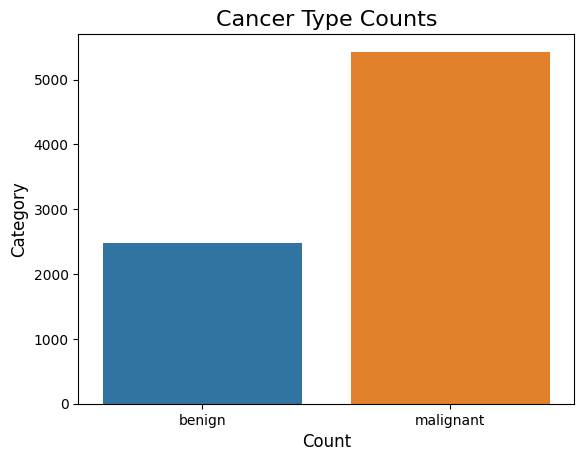

In [27]:
sns.countplot(
    data=cancer_log_extracted,
    x="Benign or Malignant",  
    hue="Benign or Malignant"  )

plt.title('Cancer Type Counts', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()


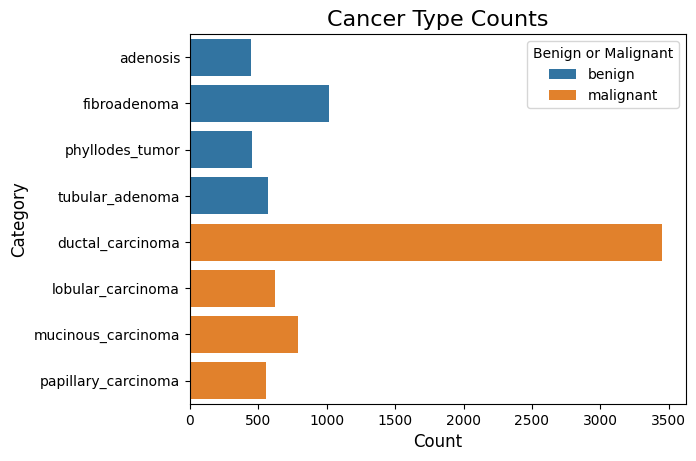

In [28]:
sns.countplot(
    data=cancer_log_extracted,
    y="Cancer Type",  
    hue="Benign or Malignant"  )

plt.title('Cancer Type Counts', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

This is a clear unbalanced problem in binary and multiclass classification, because of that we will try different methods that attempt to account for for unbalanced classes like F1 score, class weights and different losses in our implementation.

In [29]:
%cd .\Group_1

cancer_log_extracted.to_csv('image_data_clean.csv', index=False)

c:\Users\luisb\OneDrive\Documentos\uni\Year 3\Semester 1\Deep learning\project\Group_1


# Image Analysis and Visualization

Now let's start looking at the images.

In [30]:
cancer_log_extracted = pd.read_csv("image_data_clean.csv")

In [31]:
%cd ..

c:\Users\luisb\OneDrive\Documentos\uni\Year 3\Semester 1\Deep learning\project


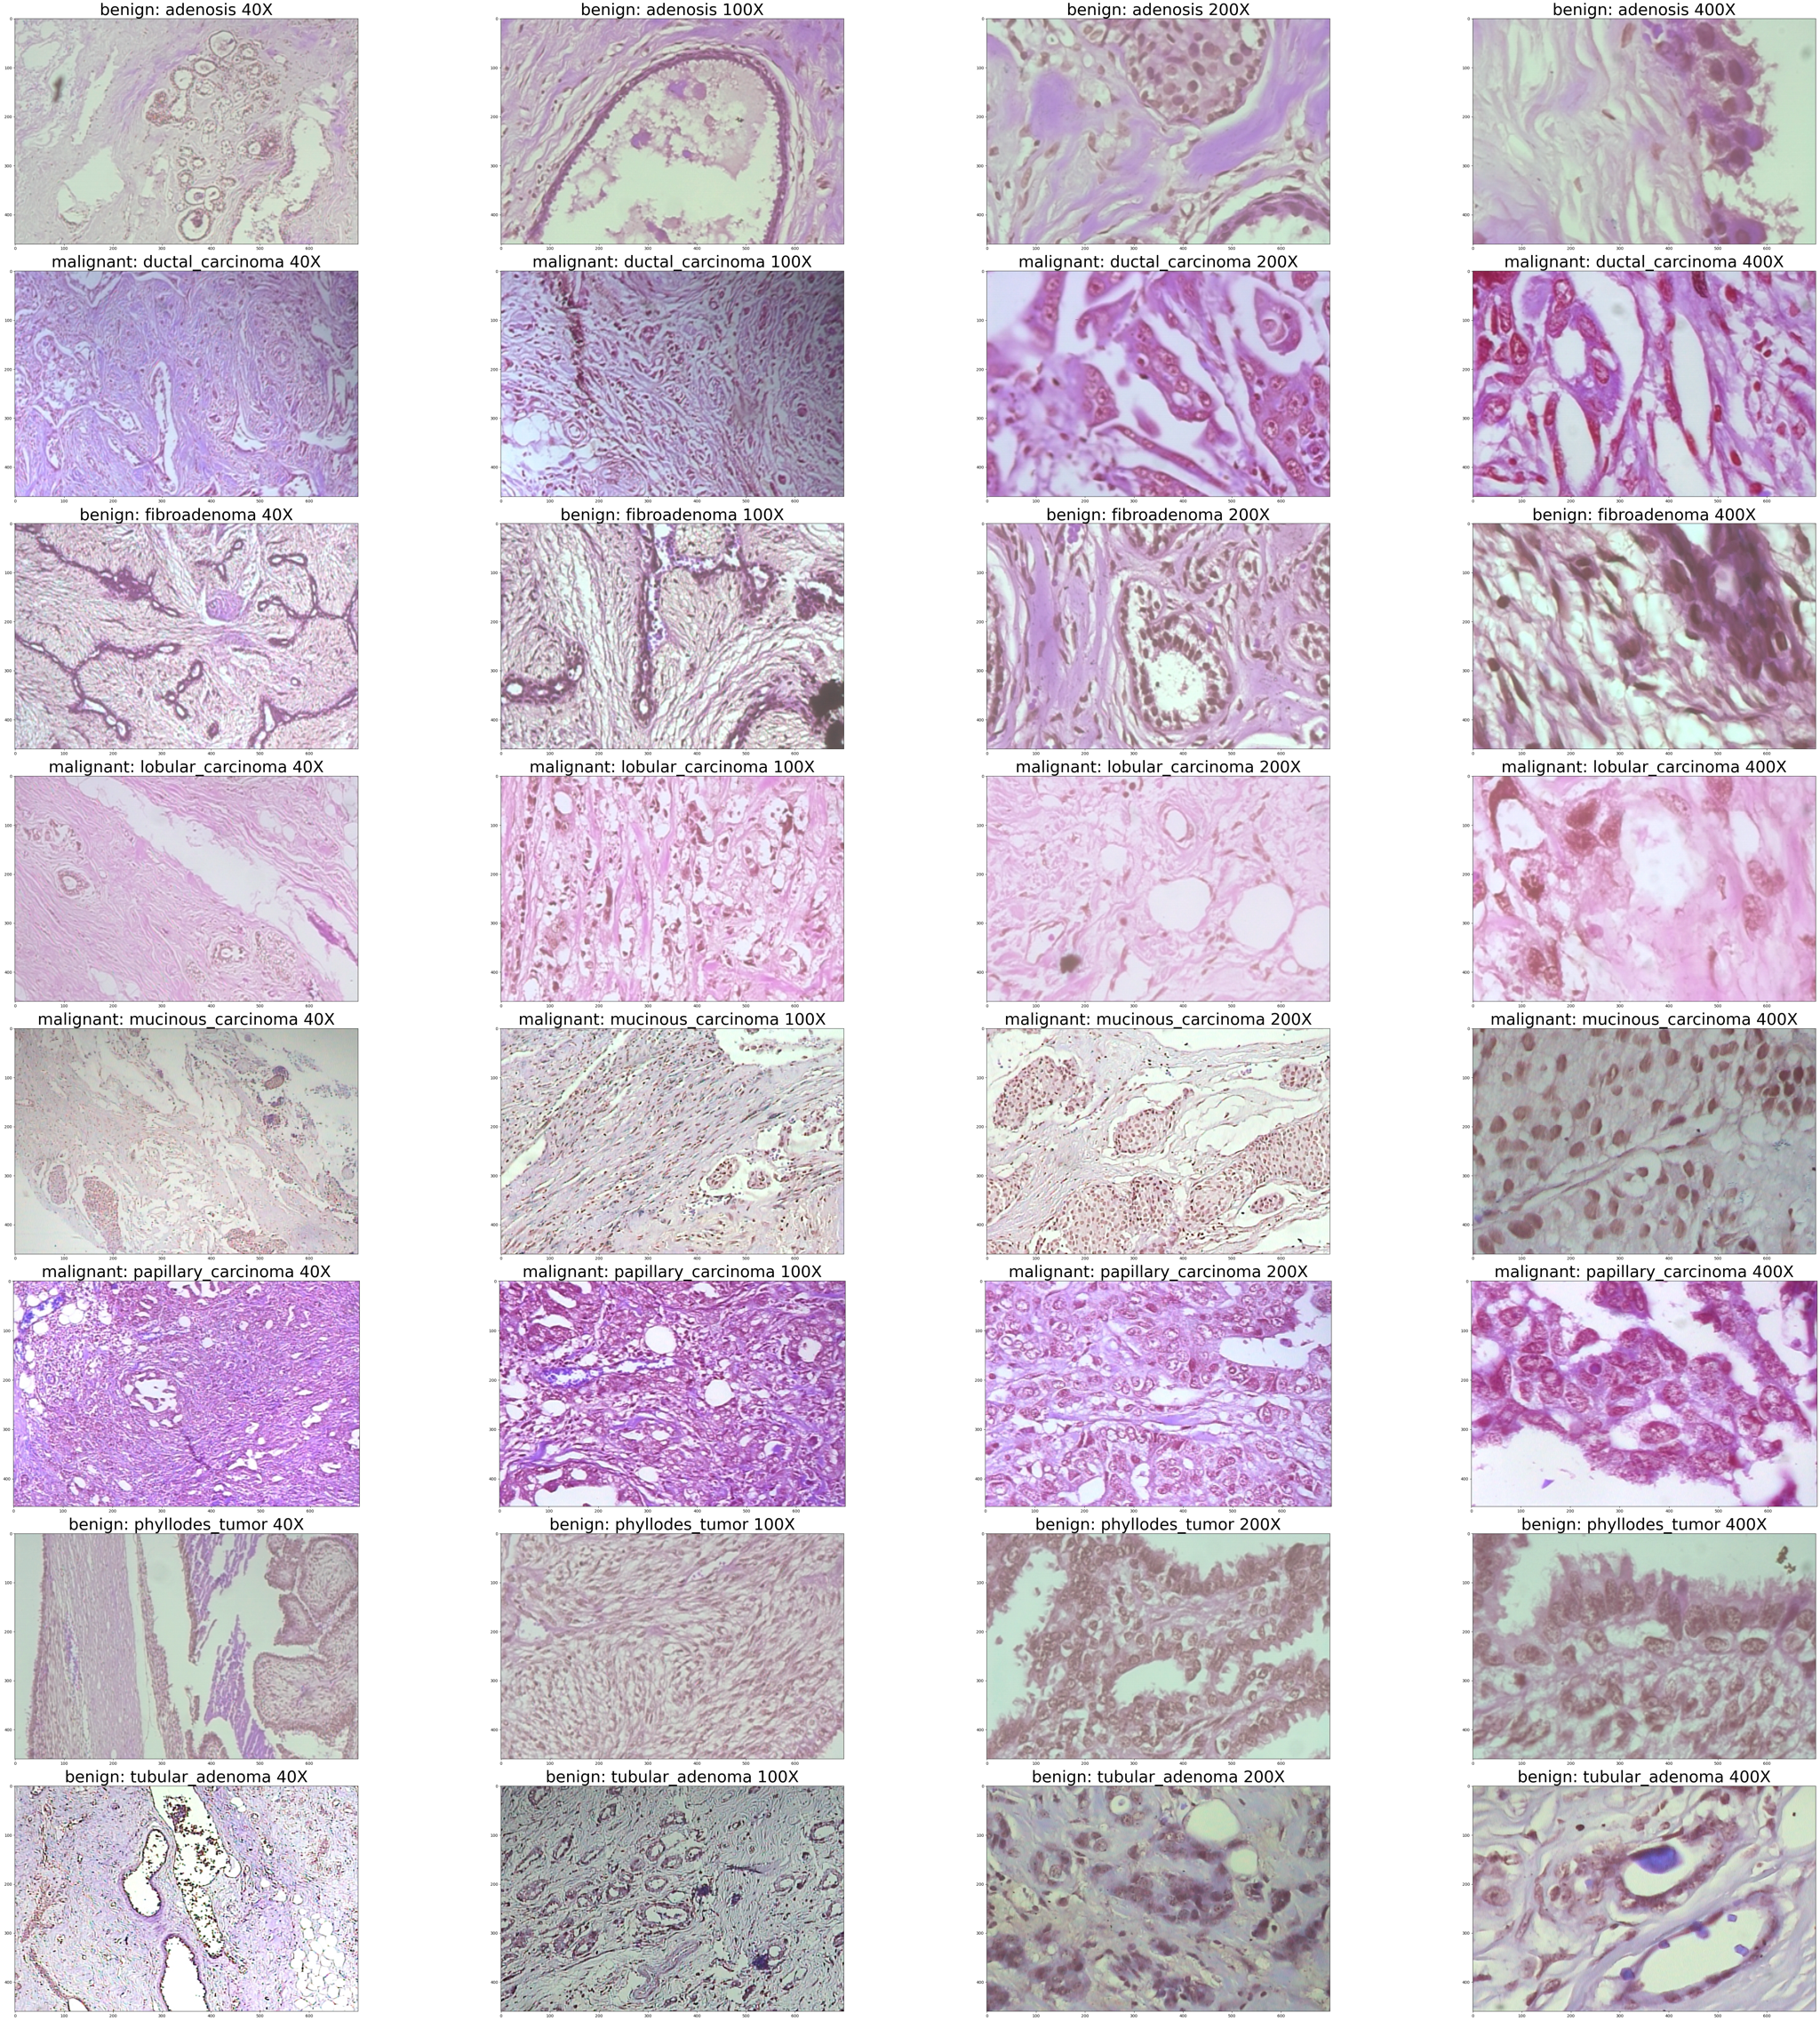

In [32]:
cancer_log_extracted['Magnification_numeric']=cancer_log_extracted['Magnification'].str.extract('(\d+)').astype(int)
path_imgs_sorted = cancer_log_extracted.sort_values(by=['Cancer Type', 'Magnification_numeric'])
path_imgs = path_imgs_sorted.groupby(['Cancer Type', 'Magnification_numeric'])[['Benign or Malignant', 'path_to_image', 'Magnification']].first().reset_index()

imgs_plot = []

for _, row in path_imgs.iterrows():
    img = cv2.imread(row['path_to_image'])
    imgs_plot.append(img)

fig, ax = plt.subplots(8,4, figsize=(70,70))
ax = ax.flatten()

for idx, img in enumerate(imgs_plot):
    ax[idx].imshow(img)
    ax[idx].set_title(path_imgs['Benign or Malignant'][idx] + ": " + path_imgs['Cancer Type'][idx] + " " + path_imgs['Magnification'][idx], fontsize=40)

plt.tight_layout()
plt.show()

cancer_log_extracted.drop(columns=['Magnification_numeric'], inplace=True)

Above, we can see the different cancer types and magnitudes, cancer types have different colors and forms between classes, so we expect to be able to find some patterns in our models that lead to good results, and also in the binary classification we see that the benign ones have less pink and less color (except for the mucinous carcinoma that it is malignant and doesn’t have those pink tones).

In [33]:
images_sizes = []

for image in tqdm(cancer_log_extracted['path_to_image']):

    img = cv2.imread(image)
    images_sizes.append(img.shape)

set(images_sizes)

100%|██████████| 7909/7909 [01:07<00:00, 116.48it/s]


{(456, 700, 3), (460, 700, 3)}

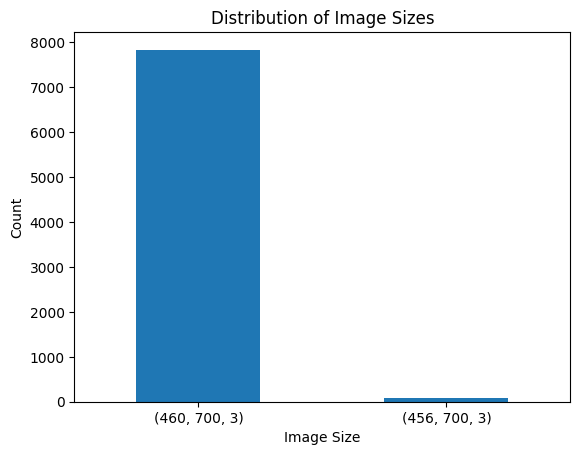

In [34]:
image_rgb = pd.Series(images_sizes)

value_count = image_rgb.value_counts()
value_count.columns = ["image_size", 'count']

value_count.plot(kind='bar', x='image_size', y='count')
plt.title('Distribution of Image Sizes')
plt.xlabel('Image Size')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Not all images are the same size, although the diference in negligible, we will need to do some resizing, to ensure all images are the same size, this is an example:

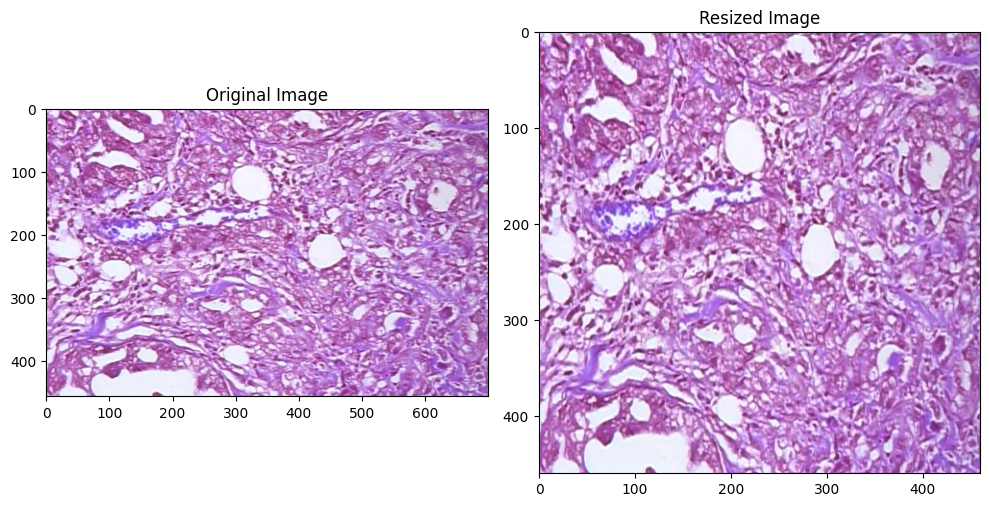

In [35]:
index_456 = image_rgb[image_rgb == (456, 700, 3)].index[0]

img_1 = cv2.imread(cancer_log_extracted['path_to_image'][index_456])

fig, ax = plt.subplots(1,2, figsize=(10, 5))
ax[0].imshow(img_1)
ax[0].set_title('Original Image')

# upscaling a smaller image
img_2 = cv2.resize(img_1, (460,460),  interpolation=cv2.INTER_CUBIC)

ax[1].imshow(img_2)
ax[1].set_title('Resized Image')
plt.tight_layout()
plt.show()

In [36]:
del images_sizes, image_rgb

In [37]:
image_RGB_vector = []

for image in tqdm(cancer_log_extracted['path_to_image']):

    img = cv2.imread(image, cv2.IMREAD_COLOR)
    img = cv2.resize(img, (460, 460), interpolation=cv2.INTER_CUBIC)

    image_RGB_vector.append(img)


100%|██████████| 7909/7909 [01:18<00:00, 101.24it/s]


In [38]:
cancer_images_rgb = np.array(image_RGB_vector)

cancer_images_rgb.shape

(7909, 460, 460, 3)

This will be the format of the shape of our input in the models: (number of samples, width, height, channels).

In [39]:
del img, image_RGB_vector

### Distribution of pixels

In [40]:
mean_channel = []
mean_overall = []
median_channel = []
median_overall = []

for image in tqdm(cancer_images_rgb):
    
    mean_overall.append(np.mean(image))
    median_overall.append(np.median(image))
    
    # group mean and median by channel (last dimension)
    mean_channel.append(np.mean(image, axis= tuple(range(image.ndim-1))))
    median_channel.append(np.median(image, axis= tuple(range(image.ndim-1))))

mean_overall = np.array(mean_overall)
mean_channel = np.array(mean_channel)
median_overall = np.array(median_overall)
median_channel = np.array(median_channel)

  0%|          | 0/7909 [00:00<?, ?it/s]

100%|██████████| 7909/7909 [01:31<00:00, 86.59it/s] 


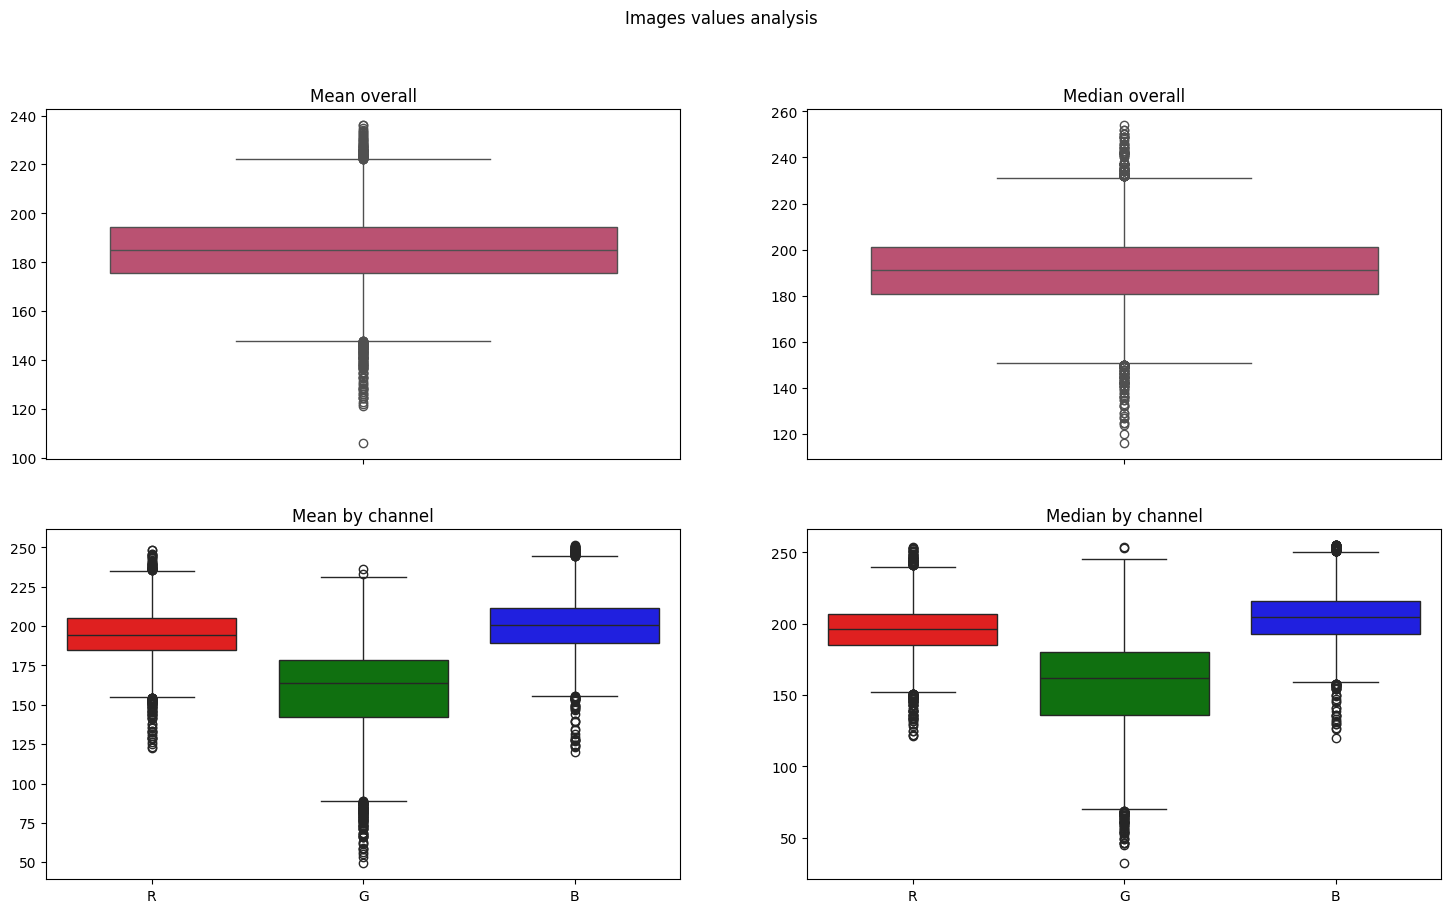

In [41]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Images values analysis')

sns.boxplot(data=mean_overall, ax = axes[0,0], palette=["#cb416b"])
axes[0,0].set_title('Mean overall')

sns.boxplot(data=median_overall, ax = axes[0,1], palette=["#cb416b"])
axes[0,1].set_title('Median overall')

sns.boxplot(data=mean_channel, ax = axes[1,0], palette=["red","green","blue"])
axes[1,0].set_title('Mean by channel')
axes[1,0].set_xticklabels(['R','G','B'])

sns.boxplot(data=median_channel,  ax = axes[1,1], palette=["red","green","blue"])
axes[1,1].set_title('Median by channel')
axes[1,1].set_xticklabels(['R','G','B'])

plt.show()


It's clear by looking at the pixel distribution that the images have different pixel representation (in magnitude/intensity and in colors), this is good since the more different that they are, the easier it should be to classify them.

## Next Step
Go to the Preprocessing notebook to see which transformations will be applied in the images to train our models.
